In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import Lars
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import VotingRegressor
from lightgbm import LGBMRegressor

import pickle

import warnings
warnings.filterwarnings('ignore')

#### Dataset Loading

In [2]:
df = pd.read_csv('Unit_1.csv')
df = df.drop(['Unnamed: 0'], axis=1)

In [102]:
df.head()

,U1_GVposition,U1_ActivePower,Maris_level,Magat_level,Tailrace_level
0,95.5652,82.4647,106.239,186.453,106.708
1,95.5652,83.0728,106.239,186.453,106.708
2,97.8933,83.0728,106.239,186.453,106.708
3,97.8933,84.0789,106.239,186.453,106.708
4,100.0690,84.0789,106.239,186.453,106.708


#### Data Exploration

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36337 entries, 0 to 36336
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   U1_GVposition   36337 non-null  float64
 1   U1_ActivePower  36337 non-null  float64
 2   Maris_level     36337 non-null  float64
 3   Magat_level     36337 non-null  float64
 4   Tailrace_level  36337 non-null  float64
dtypes: float64(5)
memory usage: 1.4 MB


In [104]:
df.describe()

,U1_GVposition,U1_ActivePower,Maris_level,Magat_level,Tailrace_level
count,36337.000000,36337.000000,36337.000000,36337.000000,36337.000000
mean,99.019009,84.158855,105.785039,184.031889,106.150284
std,1.368136,1.876252,1.013963,1.038873,0.965408
min,95.030800,73.034700,102.442000,181.760000,103.061000
25%,98.274900,82.787300,105.184000,183.326000,105.594000
50%,99.725200,84.363800,105.880000,183.819000,106.221000
75%,100.107000,85.519100,106.631000,184.797000,106.981000
max,100.565000,89.122400,107.104000,186.453000,107.527000


In [105]:
df[df.duplicated()]

,U1_GVposition,U1_ActivePower,Maris_level,Magat_level,Tailrace_level


In [106]:
df.isnull().sum()

U1_GVposition     0
U1_ActivePower    0
Maris_level       0
Magat_level       0
Tailrace_level    0
dtype: int64

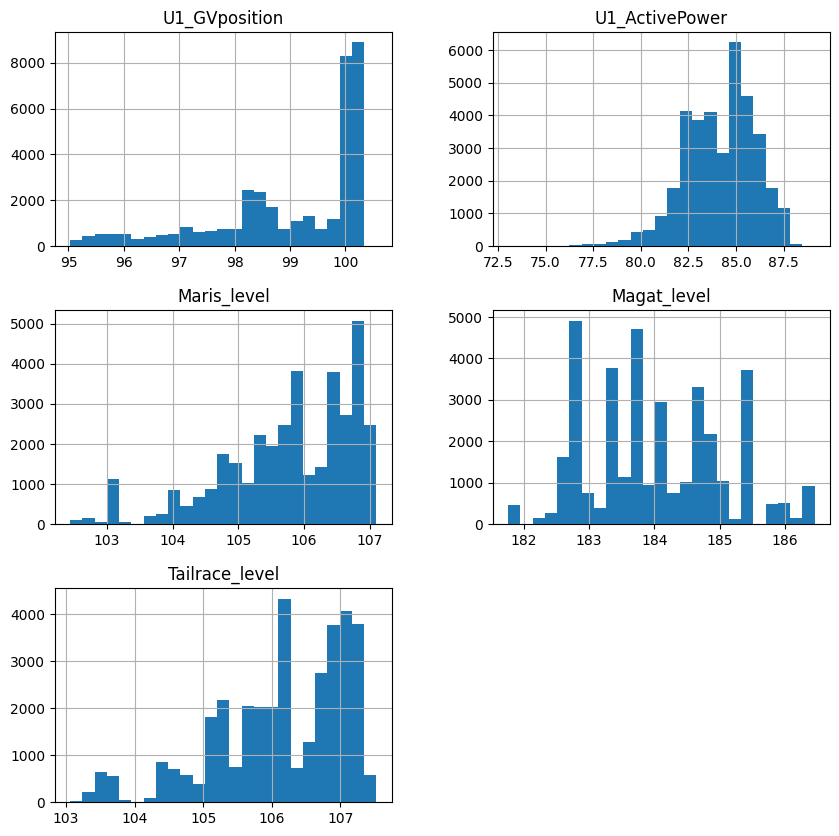

In [107]:
df.hist(bins=25, figsize=(10,10))
plt.show()

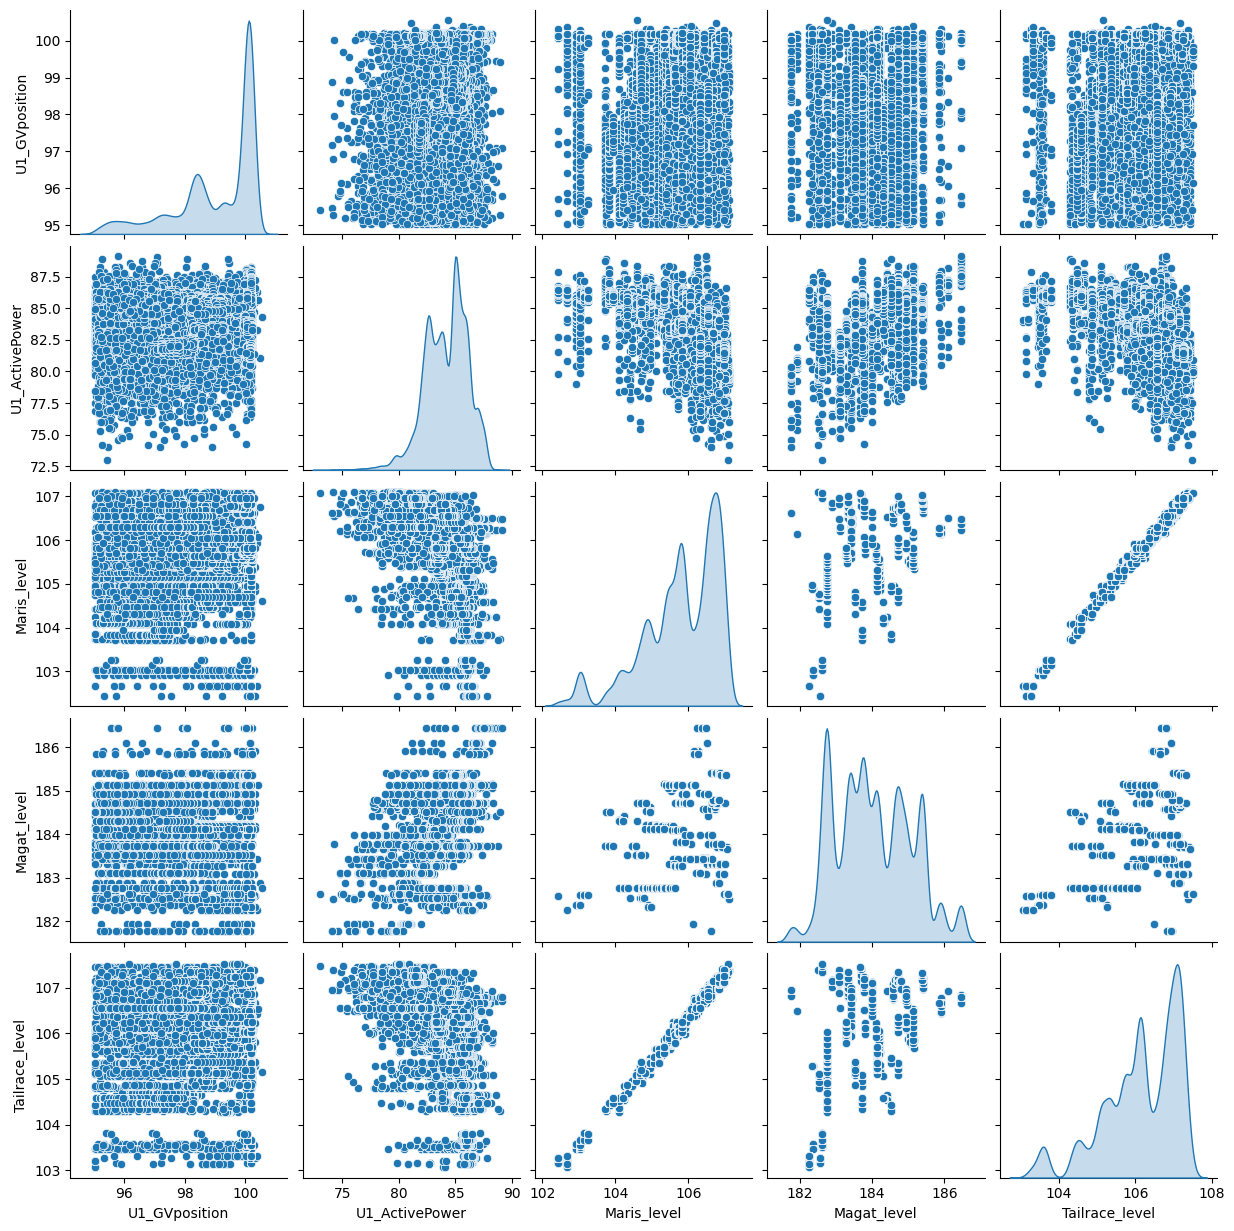

In [108]:
sns.pairplot(df, palette="Set2", diag_kind="kde", height=2.5)

<AxesSubplot: >

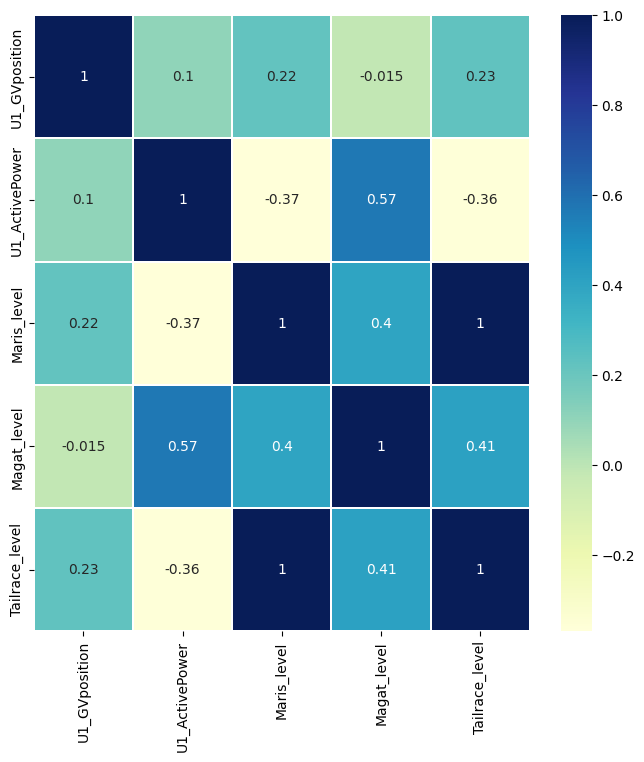

In [109]:
corrmat = df.corr()
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(corrmat, ax=ax, cmap='YlGnBu', linewidths = 0.1, annot = True)

#### Experimenting with Attribute Combinations

In [3]:
df['Hydraulic_head'] = df.Magat_level - df.Maris_level

<AxesSubplot: xlabel='Hydraulic_head', ylabel='U1_ActivePower'>

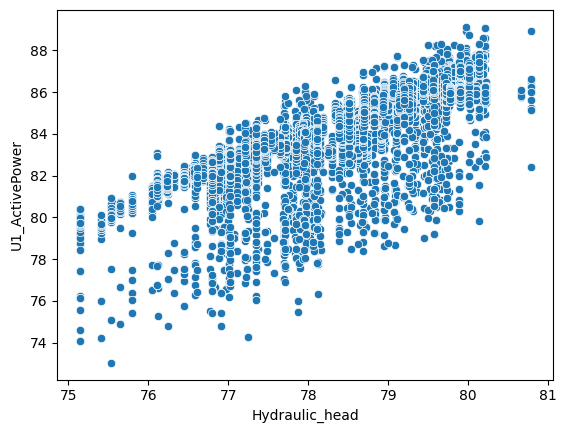

In [4]:
sns.scatterplot(x=df.Hydraulic_head, y=df.U1_ActivePower)

<AxesSubplot: >

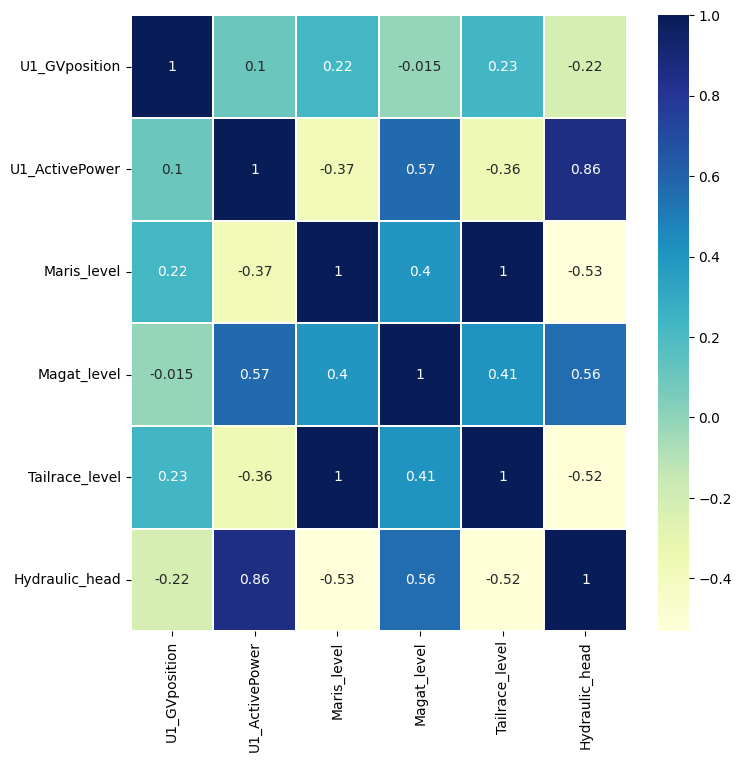

In [6]:
corrmat = df.corr()
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(corrmat, ax=ax, cmap='YlGnBu', linewidths = 0.1, annot = True)

#### Splitting of Data

In [7]:
X = df.drop('U1_ActivePower', axis=1)
y = df['U1_ActivePower']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=123)

#### Model Evaluation - "Out of the box"

In [115]:
pipelines=[]

In [116]:
pipe_lr = ('LinearRegression', (Pipeline([
    ('scaler', StandardScaler()),
    ('LR', LinearRegression())
])))

pipe_xgb = ('XGBRegressor', (Pipeline([
    ('scaler', StandardScaler()),
    ('XGB', XGBRegressor())
])))

pipe_gbr = ('GradientBoostingRegressor',Pipeline(([
    ('scaler', StandardScaler()),
    ('GBR', GradientBoostingRegressor())
])))

pipe_knn = ('KNeighbhorsRegressor',Pipeline(([
    ('scaler', StandardScaler()),
    ('KNN', KNeighborsRegressor())
])))

pipe_dtr = ('DecisionTreeRegressor',Pipeline(([
    ('scaler', StandardScaler()),
    ('DTR', DecisionTreeRegressor())
])))

pipe_svr = ('SVR',Pipeline(([
    ('scaler', StandardScaler()),
    ('SVR', SVR())
])))

pipe_mlp = ('MLPRegressor',Pipeline(([
    ('scaler', StandardScaler()),
    ('MLP', MLPRegressor())
])))

pipe_abr = ('AdaBoostRegressor',Pipeline(([
    ('scaler', StandardScaler()),
    ('ABR', AdaBoostRegressor())
])))

pipe_rfr = ('RandomForestRegressor',Pipeline(([
    ('scaler', StandardScaler()),
    ('RFR', RandomForestRegressor())
])))

pipe_etr = ('ExtraTreesRegressor',Pipeline(([
    ('scaler', StandardScaler()),
    ('RFR', ExtraTreesRegressor())
])))

pipe_hgbr = ('HistGradientBoostingRegressor',Pipeline(([
    ('scaler', StandardScaler()),
    ('HGBR', HistGradientBoostingRegressor())
])))

pipe_lgbmr = ('LGBMRegressor',Pipeline(([
    ('scaler', StandardScaler()),
    ('LGBMR', LGBMRegressor())
])))

pipe_lars = ('Lars',Pipeline(([
    ('scaler', StandardScaler()),
    ('LARS', Lars())
])))

pipe_encv = ('ElasticNetCV',Pipeline(([
    ('scaler', StandardScaler()),
    ('ENCV', ElasticNetCV())
])))

pipe_ridge = ('Ridge',Pipeline(([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])))

pipe_lcv = ('LassoCV',Pipeline(([
    ('scaler', StandardScaler()),
    ('LCV', LassoCV())
])))

In [117]:
pipelines.append(pipe_lr)
pipelines.append(pipe_xgb)
pipelines.append(pipe_gbr)
pipelines.append(pipe_knn)
pipelines.append(pipe_dtr)
pipelines.append(pipe_svr)
pipelines.append(pipe_mlp)
pipelines.append(pipe_abr)
pipelines.append(pipe_rfr)
pipelines.append(pipe_etr)
pipelines.append(pipe_hgbr)
pipelines.append(pipe_lgbmr)
pipelines.append(pipe_lars)
pipelines.append(pipe_encv)
pipelines.append(pipe_ridge)
pipelines.append(pipe_lcv)

In [118]:
model_name=[]
adjusted_r2_train=[]
adjusted_r2_valid=[]
r2_train=[]
rmse_train=[]
mae_train=[]
r2_valid=[]
rmse_valid=[]
mae_valid=[]
time=[]
N = len(X_train)
metrics = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']
for pipe, model in pipelines:
  kfold = KFold(n_splits = 5, shuffle=True, random_state=42)
  crossv_results = cross_validate(model, X_train, y_train, cv=kfold, scoring=metrics, return_train_score=True)
  r2_train.append(crossv_results['train_r2'].mean())
  adjustedr2_train = 1 - ((1 - crossv_results['train_r2'].mean()) * (N - 1) / (N - X.shape[1] - 1))
  adjusted_r2_train.append(adjustedr2_train)
  rmse_train.append(crossv_results['train_neg_root_mean_squared_error'].mean() * -1)
  mae_train.append(crossv_results['train_neg_mean_absolute_error'].mean()* -1)
  r2_valid.append(crossv_results['test_r2'].mean())
  adjustedr2_valid = 1 - ((1 - crossv_results['test_r2'].mean()) * (N - 1) / (N - X.shape[1] - 1))
  adjusted_r2_valid.append(adjustedr2_valid)
  rmse_valid.append(crossv_results['test_neg_root_mean_squared_error'].mean() * -1)
  mae_valid.append(crossv_results['test_neg_mean_absolute_error'].mean()* -1)
  time.append(crossv_results['fit_time'].mean())
  model_name.append(pipe)
  

In [119]:
valid_eval = pd.DataFrame({'Adjusted R-squared': adjusted_r2_valid, 'R-squared':r2_valid, 'RMSE':rmse_valid, 'MAE':mae_valid, 'Time Taken': time}, index=model_name)
valid_eval = valid_eval.sort_values(by=['Adjusted R-squared'], ascending=False)

In [120]:
valid_eval

,Adjusted R-squared,R-squared,RMSE,MAE,Time Taken
LGBMRegressor,0.851004,0.851033,0.721802,0.315977,0.056413
HistGradientBoostingRegressor,0.849325,0.849355,0.725804,0.320230,0.139032
GradientBoostingRegressor,0.848398,0.848428,0.727974,0.329841,0.637060
XGBRegressor,0.842352,0.842383,0.742327,0.314263,0.166133
MLPRegressor,0.841157,0.841188,0.745161,0.359854,6.731793
LinearRegression,0.839141,0.839173,0.749861,0.351138,0.004342
Lars,0.839122,0.839154,0.749907,0.351103,0.004201
Ridge,0.839122,0.839154,0.749908,0.351058,0.002201
LassoCV,0.839041,0.839073,0.750100,0.350656,0.242655
ElasticNetCV,0.838493,0.838524,0.751381,0.352197,0.343982


#### Fine-Tuning

In [121]:
pipelines_gs=[]
parameters=[]

In [122]:
params_lgbmr = {'learning_rate':[0.001, 0.01, 0.1],
         'max_depth': np.arange(-1, 16),
         'num_leaves': np.arange(5, 51),
         'n_estimators': np.arange(50, 250, 50)}

params_hgbr = {'learning_rate':[0.001, 0.01, 0.1],
                'max_depth': [None, 3, 7, 9, 13, 15]}

params_xgb = {"subsample":[None, 0.5, 0.75, 1],
         "colsample_bytree":[None, 0.5, 0.75, 1],
         'gamma': [None, 0.5, 1, 1.5, 2, 5],
         "max_depth":[None, 3, 4, 5],
         "min_child_weight":[None, 1,5,15],
         "learning_rate":[0.001, 0.01, 0.1]}

params_gbr= {'learning_rate':[0.001, 0.01, 0.1],
            'subsample'    : [0.5, 0.7, 0.1],
            'n_estimators' : [10, 50, 100, 500],
            'max_depth'    : [3, 7, 9]}

In [123]:
pipelines_gs.append(pipe_lgbmr)
pipelines_gs.append(pipe_hgbr)
pipelines_gs.append(pipe_xgb)
pipelines_gs.append(pipe_gbr)
parameters.append(params_lgbmr)
parameters.append(params_hgbr)
parameters.append(params_xgb)
parameters.append(params_gbr)

In [124]:
model_name=[]
score=[]
best_param=[]
kfold = KFold(n_splits = 5, shuffle=True, random_state=42)

i=0
for pipe, model in pipelines_gs:
    gs = GridSearchCV(model[1], param_grid=parameters[i], cv=kfold, scoring='neg_mean_absolute_error', n_jobs=-1)
    gs.fit(X_train, y_train)
    score.append(gs.best_score_ * -1)
    best_param.append(gs.best_params_)
    model_name.append(pipe+ '_gs')

    rs = RandomizedSearchCV(model[1], param_distributions=parameters[i], n_iter=100, cv=kfold, scoring='neg_mean_absolute_error', n_jobs=-1)
    rs.fit(X_train, y_train)
    score.append(rs.best_score_ * -1)
    best_param.append(rs.best_params_)
    model_name.append(pipe + '_rs')
    i+=1

In [125]:
results = pd.DataFrame({'MAE':score, 'Parameters': best_param}, index=model_name)

In [126]:
results

,MAE,Parameters
LGBMRegressor_gs,0.314185,"{'learning_rate': 0.1, 'max_depth': 8, 'n_esti..."
LGBMRegressor_rs,0.315046,"{'num_leaves': 48, 'n_estimators': 200, 'max_d..."
HistGradientBoostingRegressor_gs,0.318074,"{'learning_rate': 0.1, 'max_depth': 15}"
HistGradientBoostingRegressor_rs,0.318459,"{'max_depth': None, 'learning_rate': 0.1}"
XGBRegressor_gs,0.313825,"{'colsample_bytree': 0.75, 'gamma': None, 'lea..."
XGBRegressor_rs,0.313849,"{'subsample': None, 'min_child_weight': None, ..."
GradientBoostingRegressor_gs,0.311588,"{'learning_rate': 0.01, 'max_depth': 9, 'n_est..."
GradientBoostingRegressor_rs,0.311458,"{'subsample': 0.7, 'n_estimators': 500, 'max_d..."


In [127]:
#parameter checker
results['Parameters'][2]

{'learning_rate': 0.1, 'max_depth': 15}

#### Cross-validate with the optimal parameters

In [9]:
pipelines_optim=[]

In [10]:
pipe_xgb_tuned = ('XGBRegressor', (Pipeline([
    ('scaler', StandardScaler()),
    ('XGB', XGBRegressor(colsample_bytree= 0.75, gamma= 0.5,
 learning_rate= 0.1,
 max_depth= 5,
 min_child_weight= 1,
 n_estimators= 100,
 subsample= 1.0))
])))

pipe_lgbmr_tuned = ('LGBMRegressor',Pipeline(([
    ('scaler', StandardScaler()),
    ('LGBMR', LGBMRegressor(learning_rate= 0.1, max_depth= 7, n_estimators= 150, num_leaves= 40))
])))

pipe_gbr_tuned = ('GradientBoostingRegressor',Pipeline(([
    ('scaler', StandardScaler()),
    ('GBR', GradientBoostingRegressor(learning_rate= 0.01, max_depth= 9, n_estimators= 500, subsample= 0.7))
])))

pipe_hgbr_tuned = ('HistGradientBoostingRegressor',Pipeline(([
    ('scaler', StandardScaler()),
    ('HGBR', HistGradientBoostingRegressor(learning_rate= 0.1, max_depth= 5))
])))


In [11]:

pipelines_optim.append(pipe_xgb_tuned)
pipelines_optim.append(pipe_lgbmr_tuned)
pipelines_optim.append(pipe_gbr_tuned)
pipelines_optim.append(pipe_hgbr_tuned)


In [131]:
model_name=[]
adjusted_r2_train=[]
adjusted_r2_valid=[]
r2_train=[]
rmse_train=[]
mae_train=[]
r2_valid=[]
rmse_valid=[]
mae_valid=[]
time=[]
N = len(X_train)
metrics = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']
for pipe, model in pipelines_optim:
  kfold = KFold(n_splits = 5, shuffle=True, random_state=42)
  crossv_tuned = cross_validate(model, X_train, y_train, cv=kfold, scoring=metrics, return_train_score=True)
  r2_train.append(crossv_tuned['train_r2'].mean())
  adjustedr2_train = 1 - ((1 - crossv_tuned['train_r2'].mean()) * (N - 1) / (N - X.shape[1] - 1))
  adjusted_r2_train.append(adjustedr2_train)
  rmse_train.append(crossv_tuned['train_neg_root_mean_squared_error'].mean() * -1)
  mae_train.append(crossv_tuned['train_neg_mean_absolute_error'].mean()* -1)
  r2_valid.append(crossv_tuned['test_r2'].mean())
  adjustedr2_valid = 1 - ((1 - crossv_tuned['test_r2'].mean()) * (N - 1) / (N - X.shape[1] - 1))
  adjusted_r2_valid.append(adjustedr2_valid)
  rmse_valid.append(crossv_tuned['test_neg_root_mean_squared_error'].mean() * -1)
  mae_valid.append(crossv_tuned['test_neg_mean_absolute_error'].mean()* -1)
  time.append(crossv_tuned['fit_time'].mean())
  model_name.append(pipe)
  

In [132]:
valid_tuned = pd.DataFrame({'Adjusted R-squared': adjusted_r2_valid, 'R-squared':r2_valid, 'RMSE':rmse_valid, 'MAE':mae_valid, 'Time Taken': time}, index=model_name)
valid_tuned = valid_tuned.sort_values(by=['Adjusted R-squared'], ascending=False)

In [133]:
valid_tuned

,Adjusted R-squared,R-squared,RMSE,MAE,Time Taken
XGBRegressor,0.853157,0.853185,0.716479,0.317227,0.125029
LGBMRegressor,0.851162,0.851191,0.721409,0.314736,0.065316
HistGradientBoostingRegressor,0.849432,0.849461,0.725564,0.319690,0.121741
GradientBoostingRegressor,0.840339,0.840370,0.747042,0.311452,5.792576


#### Ensemble Method

In [134]:
ereg = VotingRegressor(estimators=[pipe_xgb_tuned, pipe_lgbmr_tuned, pipe_hgbr_tuned, pipe_gbr_tuned])

In [135]:
kfold = KFold(n_splits = 5, shuffle=True, random_state=42)
crossv_tuned_ensemble = cross_validate(ereg, X_train, y_train, cv=kfold, scoring=metrics, return_train_score=True)
r2_valid_ensemble = crossv_tuned_ensemble['test_r2'].mean()
adjustedr2_valid_ensemble = 1 - ((1 - crossv_tuned_ensemble['test_r2'].mean()) * (N - 1) / (N - X.shape[1] - 1))
rmse_valid_ensemble = crossv_tuned_ensemble['test_neg_root_mean_squared_error'].mean() * -1
mae_valid_ensemble = crossv_tuned_ensemble['test_neg_mean_absolute_error'].mean()* -1

print(f'Ensemble Model Adjusted R-Squared: {adjustedr2_valid_ensemble} R-Squared: {r2_valid_ensemble}')
print(f'RMSE: {rmse_valid_ensemble} MAE:{mae_valid_ensemble}')

Ensemble Model Adjusted R-Squared: 0.8534414116345113 R-Squared: 0.8534702231836906
RMSE: 0.7158190399477784 MAE:0.3105667534399953


#### Feature Importance

In [136]:
import shap

In [137]:
pipe_gbr_tuned[1].fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('GBR',
                 GradientBoostingRegressor(learning_rate=0.01, max_depth=9,
                                           n_estimators=500, subsample=0.7))])

In [ ]:
shap_values = shap.Explainer(pipe_gbr_tuned[1][1]).shap_values(X_train)

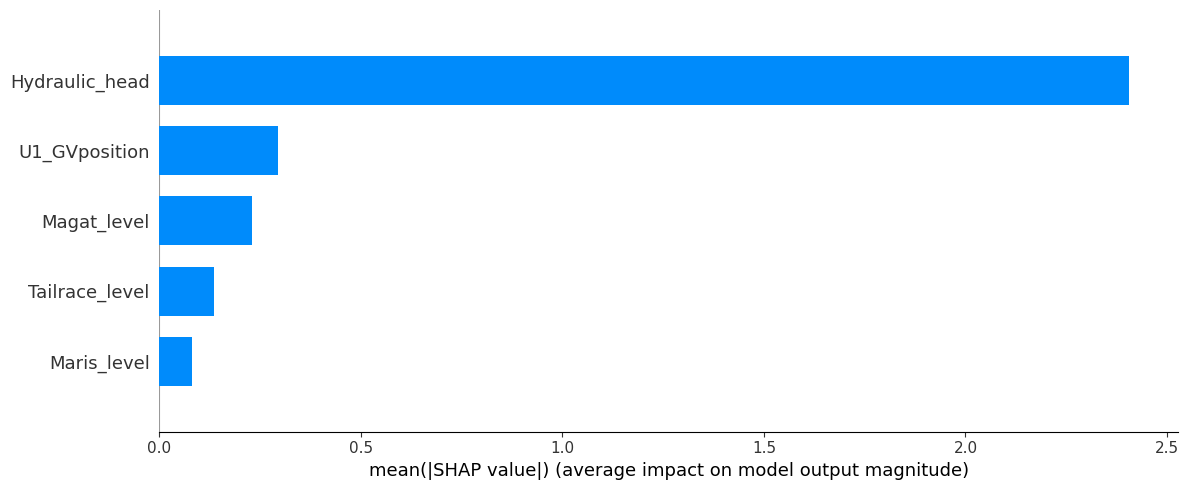

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type='bar', plot_size=(12,5))

##### Dropping Variables

In [ ]:
X = df.drop(['U1_ActivePower', 'Maris_level'], axis=1)
y = df['U1_ActivePower']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=123)

##### Retraining

In [ ]:
model_name=[]
adjusted_r2_train=[]
adjusted_r2_valid=[]
r2_train=[]
rmse_train=[]
mae_train=[]
r2_valid=[]
rmse_valid=[]
mae_valid=[]
time=[]
N = len(X_train)
metrics = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']
for pipe, model in pipelines_optim:
  kfold = KFold(n_splits = 5, shuffle=True, random_state=42)
  crossv_tuned = cross_validate(model, X_train, y_train, cv=kfold, scoring=metrics, return_train_score=True)
  r2_train.append(crossv_tuned['train_r2'].mean())
  adjustedr2_train = 1 - ((1 - crossv_tuned['train_r2'].mean()) * (N - 1) / (N - X.shape[1] - 1))
  adjusted_r2_train.append(adjustedr2_train)
  rmse_train.append(crossv_tuned['train_neg_root_mean_squared_error'].mean() * -1)
  mae_train.append(crossv_tuned['train_neg_mean_absolute_error'].mean()* -1)
  r2_valid.append(crossv_tuned['test_r2'].mean())
  adjustedr2_valid = 1 - ((1 - crossv_tuned['test_r2'].mean()) * (N - 1) / (N - X.shape[1] - 1))
  adjusted_r2_valid.append(adjustedr2_valid)
  rmse_valid.append(crossv_tuned['test_neg_root_mean_squared_error'].mean() * -1)
  mae_valid.append(crossv_tuned['test_neg_mean_absolute_error'].mean()* -1)
  time.append(crossv_tuned['fit_time'].mean())
  model_name.append(pipe)
  

In [ ]:
valid_tuned = pd.DataFrame({'Adjusted R-squared': adjusted_r2_valid, 'R-squared':r2_valid, 'RMSE':rmse_valid, 'MAE':mae_valid, 'Time Taken': time}, index=model_name)
valid_tuned = valid_tuned.sort_values(by=['Adjusted R-squared'], ascending=False)

In [ ]:
valid_tuned

,Adjusted R-squared,R-squared,RMSE,MAE,Time Taken
XGBRegressor,0.851092,0.851115,0.721542,0.319332,0.131630
LGBMRegressor,0.850356,0.850380,0.723374,0.315804,0.085419
HistGradientBoostingRegressor,0.849467,0.849491,0.725474,0.320208,0.154833
GradientBoostingRegressor,0.840241,0.840267,0.747313,0.311625,5.184688


#### Model Evaluation on Test Set

In [34]:
final_models = []

In [35]:
pipe_xgb_tuned = ('XGBRegressor', (Pipeline([
    ('scaler', StandardScaler()),
    ('XGB', XGBRegressor(colsample_bytree= 0.75, gamma= 0.5,
 learning_rate= 0.1,
 max_depth= 5,
 min_child_weight= 1,
 n_estimators= 100,
 subsample= 1.0))
])))

pipe_lgbmr_tuned = ('LGBMRegressor',Pipeline(([
    ('scaler', StandardScaler()),
    ('LGBMR', LGBMRegressor(learning_rate= 0.1, max_depth= 7, n_estimators= 150, num_leaves= 40))
])))

pipe_gbr_tuned = ('GradientBoostingRegressor',Pipeline(([
    ('scaler', StandardScaler()),
    ('GBR', GradientBoostingRegressor(learning_rate= 0.01, max_depth= 9, n_estimators= 500, subsample= 0.7))
])))

pipe_hgbr_tuned = ('HistGradientBoostingRegressor',Pipeline(([
    ('scaler', StandardScaler()),
    ('HGBR', HistGradientBoostingRegressor(learning_rate= 0.1, max_depth= 5))
])))

ereg = ('Ensemble Model', (VotingRegressor(estimators=[pipe_xgb_tuned, pipe_lgbmr_tuned, pipe_hgbr_tuned, pipe_gbr_tuned])))

In [36]:

final_models.append(pipe_xgb_tuned)
final_models.append(pipe_lgbmr_tuned)
final_models.append(pipe_gbr_tuned)
final_models.append(pipe_hgbr_tuned)
final_models.append(ereg)

In [37]:
final_r2=[]
final_adjusted_r2=[]
final_rmse=[]
final_mae=[]
final_model_name=[]
N = len(X_train)

for pipe, model in final_models:
    model.fit(X_train, y_train)
    final_predictions = model.predict(X_test)
    r2 = r2_score(y_test, final_predictions)
    final_r2.append(r2)
    final_adjusted_r2.append(1 - ((1 - r2) * (N - 1) / (N - X.shape[1] - 1)))
    final_rmse.append(mean_squared_error(y_test, final_predictions))
    final_mae.append(mean_absolute_error(y_test, final_predictions))
    final_model_name.append(pipe)


In [43]:
final_eval = pd.DataFrame({'Adjusted R-squared': final_adjusted_r2, 'R-squared':final_r2, 'RMSE':final_rmse, 'MAE':final_mae}, index=final_model_name)
final_eval = final_eval.sort_values(by=['Adjusted R-squared'], ascending=False)

In [44]:
final_eval

,Adjusted R-squared,R-squared,RMSE,MAE
Ensemble Model,0.846465,0.846495,0.548038,0.318347
XGBRegressor,0.846249,0.846279,0.548809,0.324163
LGBMRegressor,0.844445,0.844476,0.555247,0.322243
HistGradientBoostingRegressor,0.844119,0.844150,0.556410,0.330196
GradientBoostingRegressor,0.835546,0.835579,0.587011,0.318898


#### Saving the models

In [71]:
model_ensemble = ereg[1].fit(X_train, y_train)
pickle.dump(model_ensemble, open('saved_model/ensemble_model.pkl', 'wb'))


In [72]:
loaded_model = pickle.load(open('saved_model/ensemble_model.pkl', 'rb'))
preds = loaded_model.predict(X_test)
mean_absolute_error(y_test, preds)

0.3181191441609126

In [73]:
model_xgb = pipe_xgb_tuned[1].fit(X_train, y_train)
pickle.dump(model_xgb, open('saved_model/xgb_model.pkl', 'wb'))

In [74]:
loaded_model = pickle.load(open('saved_model/xgb_model.pkl', 'rb')) 
preds = loaded_model.predict(X_test)
mean_absolute_error(y_test, preds)

0.32416303120516693

In [75]:
model_lgbm = pipe_lgbmr_tuned[1].fit(X_train, y_train)
pickle.dump(model_lgbm, open('saved_model/lgbm_model.pkl', 'wb'))

In [76]:
loaded_model = pickle.load(open('saved_model/lgbm_model.pkl', 'rb')) 
preds = loaded_model.predict(X_test)
mean_absolute_error(y_test, preds)

0.32224331199928474

In [77]:
model_hgbr = pipe_hgbr_tuned[1].fit(X_train, y_train)
pickle.dump(model_hgbr, open('saved_model/hgbr_model.pkl', 'wb'))

In [78]:
loaded_model = pickle.load(open('saved_model/hgbr_model.pkl', 'rb'))
preds = loaded_model.predict(X_test)
mean_absolute_error(y_test, preds)

0.32741475906849327

In [79]:
model_gbr = pipe_gbr_tuned[1].fit(X_train, y_train)
pickle.dump(model_gbr, open('saved_model/gbr_model.pkl', 'wb'))

In [80]:
loaded_model = pickle.load(open('saved_model/gbr_model.pkl', 'rb'))
preds = loaded_model.predict(X_test)
mean_absolute_error(y_test, preds)

0.3187351327701297